In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [118]:
#Importing dataset
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


### **The dataset ranks different countries on the basis of their happines score.**
**We will be building a model to predict happiness score which is a regression problem**

In [119]:
#Dropping columns that we will not be using in our analysis
df.drop('Standard Error',axis=1,inplace=True)
df.drop('Dystopia Residual',axis=1,inplace=True)

In [120]:
#Checking dimensions of dataset
df.shape

(158, 10)

In [121]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
dtype: object

In [122]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
dtype: int64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 12.5+ KB


In [124]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.839,4.526000,5.232500,6.243750,7.58700
Economy (GDP per Capita),158.0,0.846137,0.403121,0.000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.000,0.150553,0.216130,0.309883,0.79588


In [130]:
#Renaming columns for analysis
df1=df.rename({'Happiness Rank':'Rank','Happiness Score':'Score','Economy (GDP per Capita)':'GDP','Health (Life Expectancy)':'Health','Trust (Government Corruption)':'Trust'},axis=1)
df1

,Country,Region,Rank,Score,GDP,Family,Health,Freedom,Trust,Generosity
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,Benin,Sub-Saharan Africa,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,Syria,Middle East and Northern Africa,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,Burundi,Sub-Saharan Africa,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


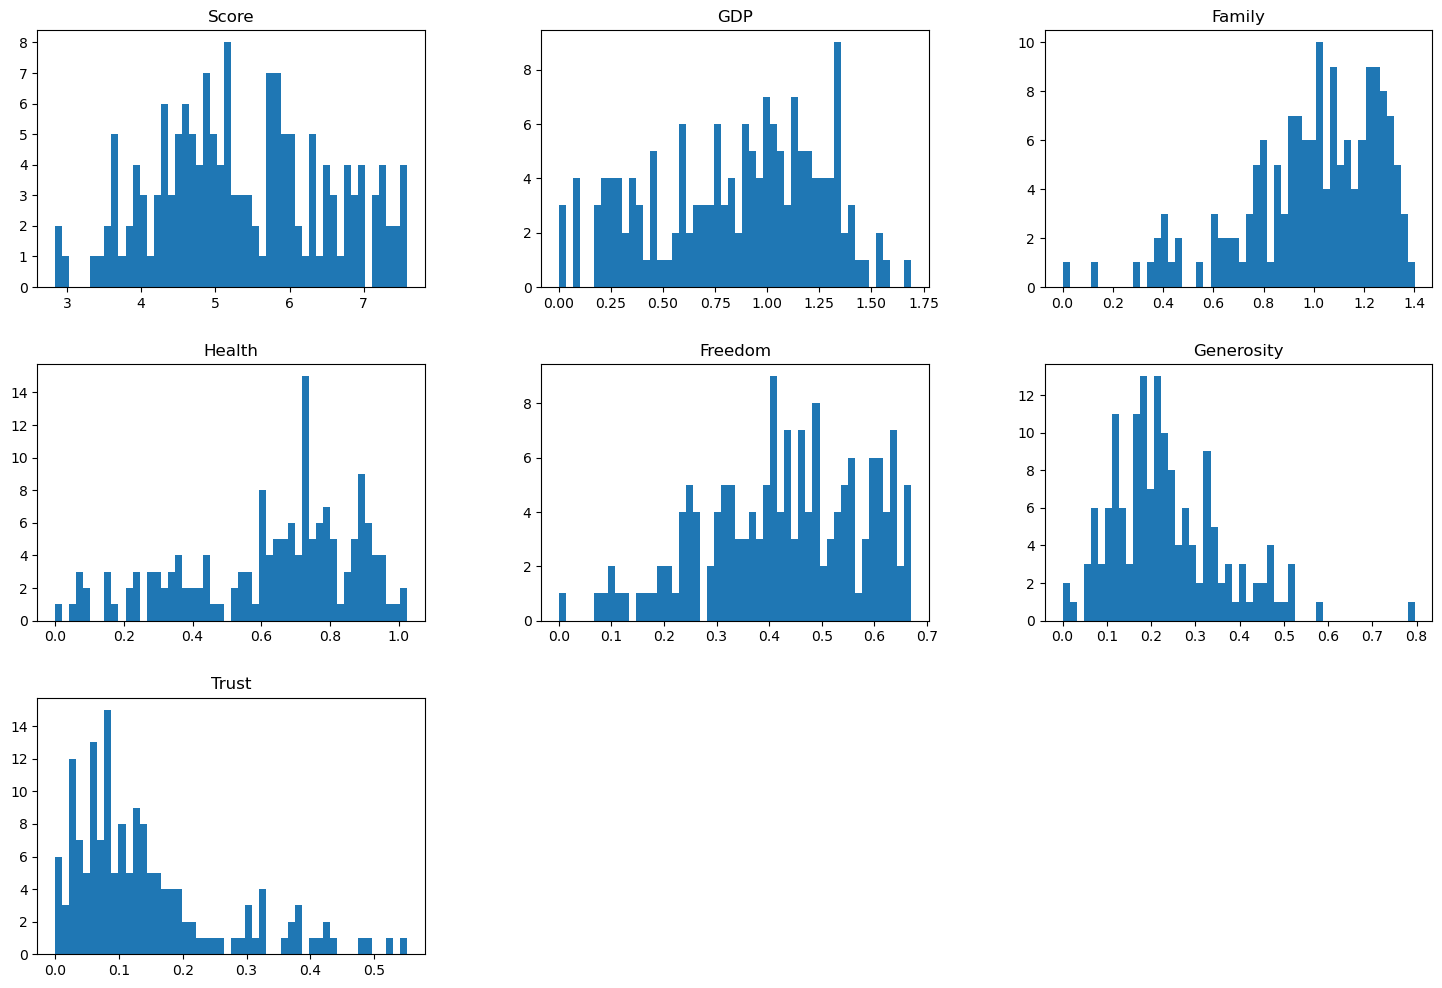

In [134]:
df1[[
    "Score",
     "GDP",
    "Family",
    "Health",
    "Freedom",
   "Generosity",
     "Trust"]].hist(figsize=(18,12), bins=50, grid=False);

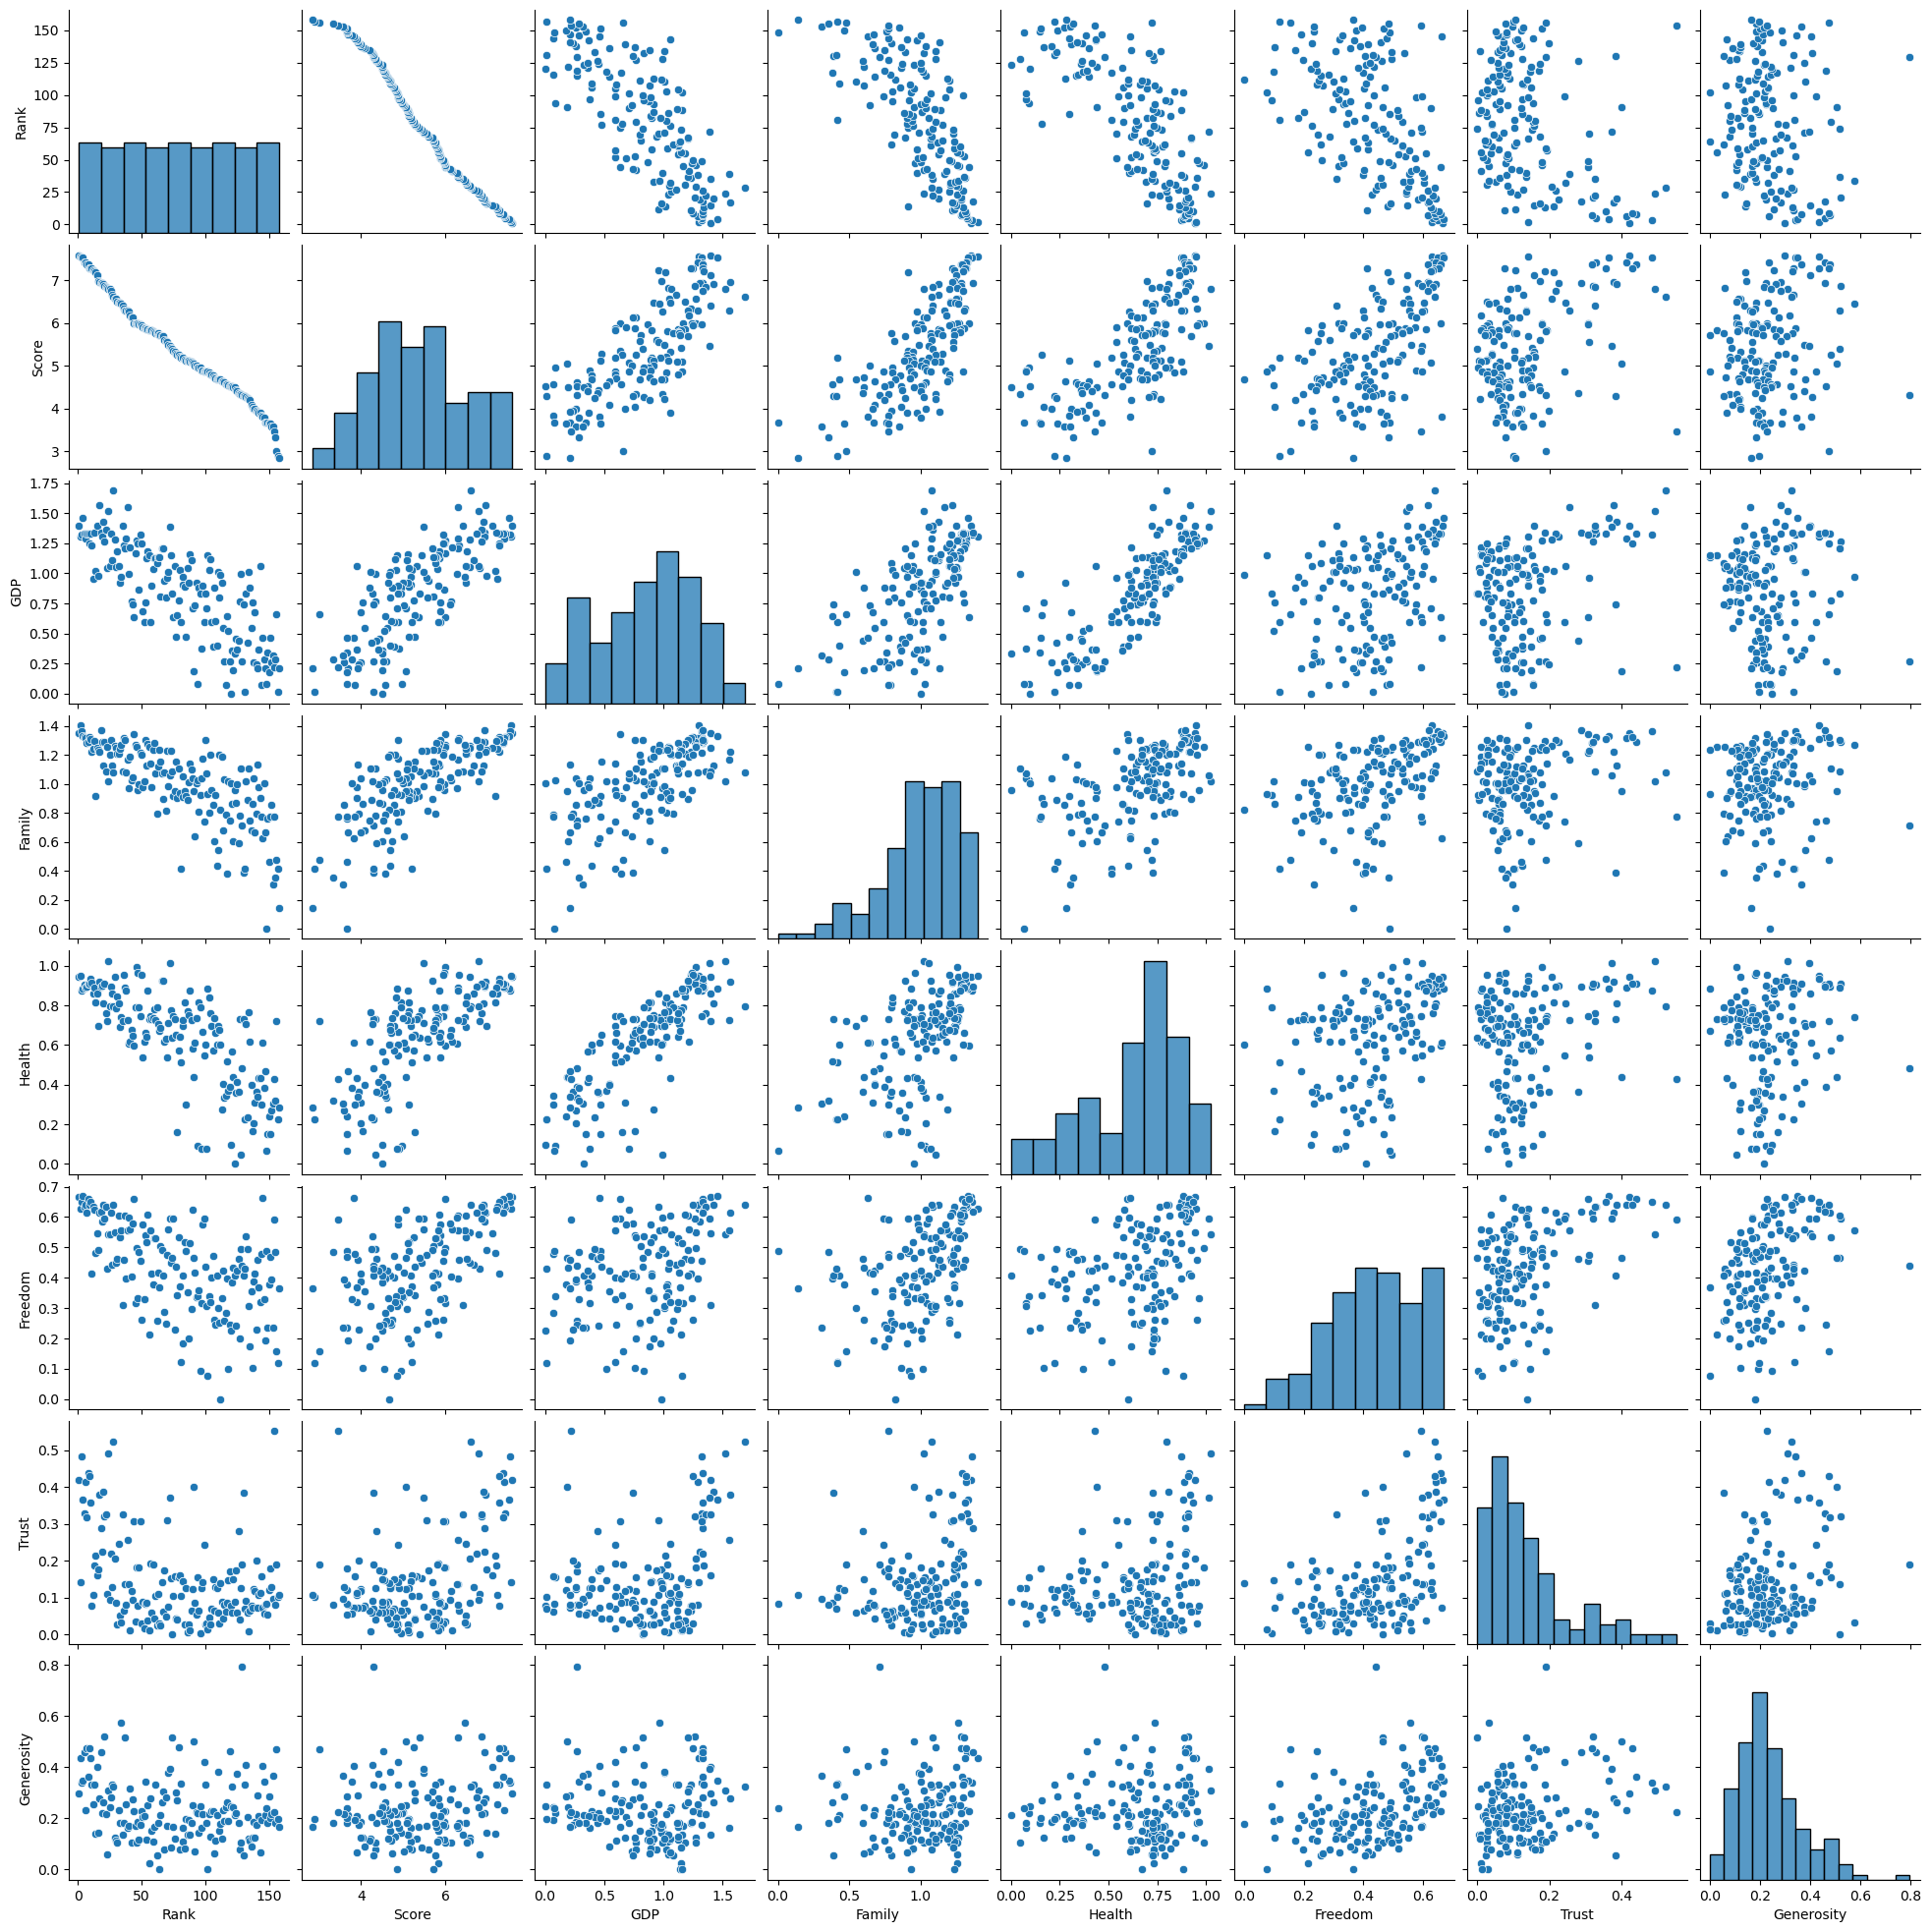

In [135]:
sns.pairplot(df1);

<Axes: >

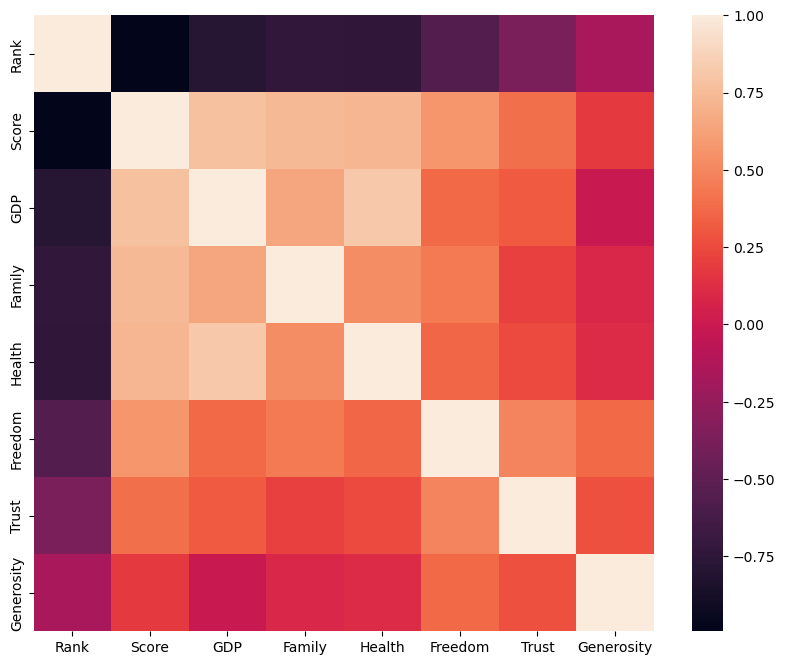

In [136]:
plt.subplots(figsize=(10,8))
sns.heatmap(df1.corr())

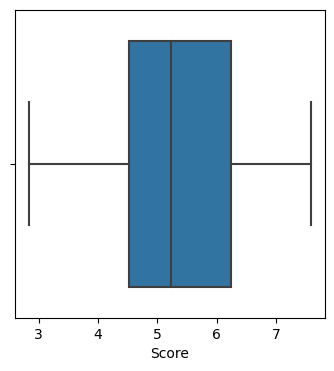

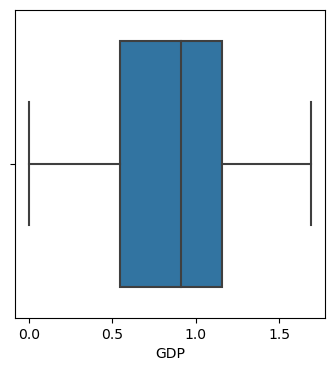

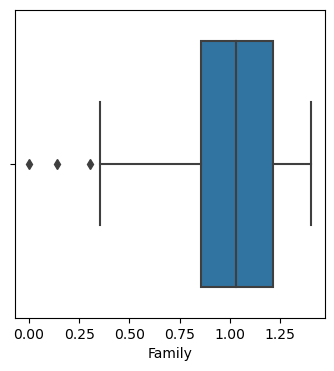

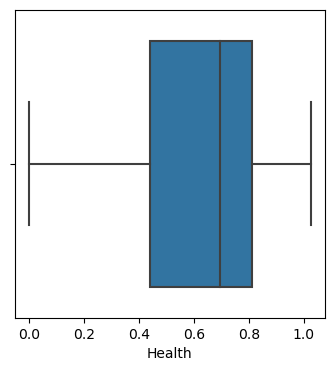

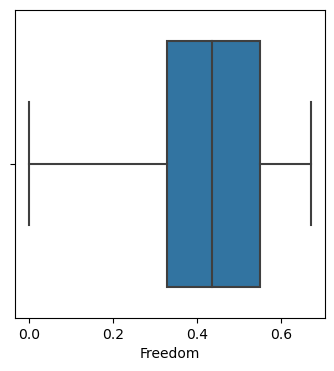

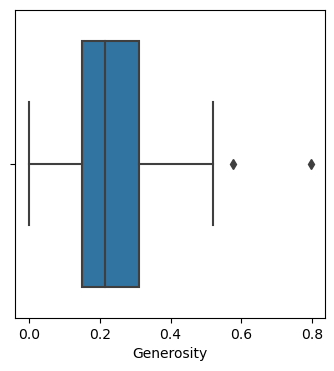

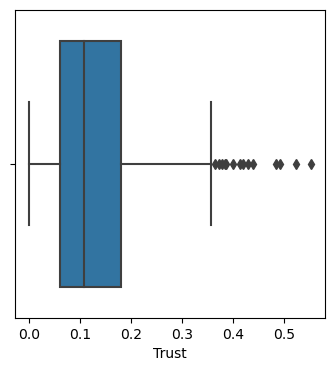

In [140]:
column_list = ["Score","GDP","Family","Health","Freedom","Generosity","Trust"]
for col in column_list:
    plt.figure(figsize=(4,4))
    sns.boxplot(x = df1[col])
    plt.xlabel(col)
    plt.show()

#### We have observed that there are outliers in the "Family", "Generosity" and "Trust" column. This may cause us to negatively affect us while training our data set.

In [141]:
# for Trust
df_table = df1["Trust"]

Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("lower bound is " + str(lower_bound))
print("upper bound is " + str(upper_bound))
print("Q1: ", Q1)
print("Q3: ", Q3)

lower bound is -0.11619499999999996
upper bound is 0.35812499999999997
Q1:  0.061675
Q3:  0.180255


In [142]:
outliers_vector = (df_table < (lower_bound)) | (df_table > (upper_bound))
outliers_vector

0       True
1      False
2       True
3       True
4      False
       ...  
153     True
154    False
155    False
156    False
157    False
Name: Trust, Length: 158, dtype: bool

In [143]:
outliers_vector = df_table[outliers_vector]
outliers_vector.index.values

array([  0,   2,   3,   5,   7,   8,  16,  19,  23,  27,  71,  90, 129,
       153], dtype=int64)

#### Deleting data is not suitable for this data set. That's why we will fill out the outliers with the average

In [144]:
df_table = df1.copy()
df_table["Trust"].iloc[outliers_vector.index.values] = df_table["Trust"].mean()
df_table["Trust"].iloc[outliers_vector.index.values]

0      0.143422
2      0.143422
3      0.143422
5      0.143422
7      0.143422
8      0.143422
16     0.143422
19     0.143422
23     0.143422
27     0.143422
71     0.143422
90     0.143422
129    0.143422
153    0.143422
Name: Trust, dtype: float64

In [145]:
df1 = df_table

## Score-GDP

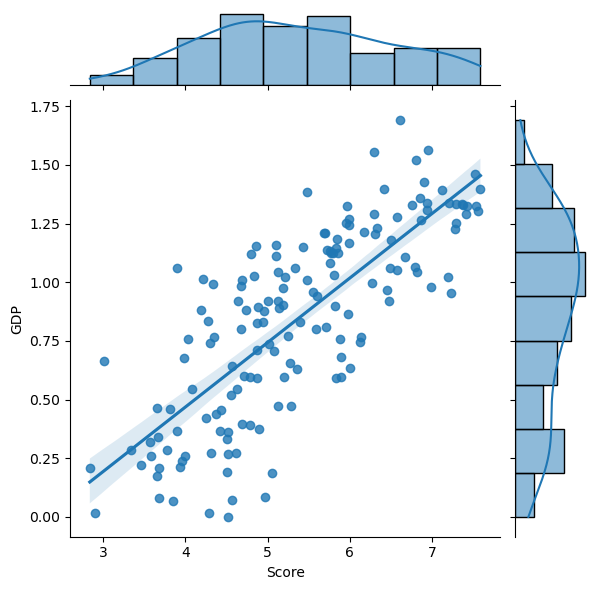

In [150]:
sns.jointplot(x='Score',y='GDP',data=df_table,kind="reg")
plt.show()

In [155]:
from sklearn.linear_model import LinearRegression
X = df_table[["GDP"]]
X.head

<bound method NDFrame.head of          GDP
0    1.39651
1    1.30232
2    1.32548
3    1.45900
4    1.32629
..       ...
153  0.22208
154  0.28665
155  0.66320
156  0.01530
157  0.20868

[158 rows x 1 columns]>

In [156]:
Y = df_table[["Score"]]
Y.head

<bound method NDFrame.head of      Score
0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
..     ...
153  3.465
154  3.340
155  3.006
156  2.905
157  2.839

[158 rows x 1 columns]>

In [157]:
reg = LinearRegression()
model = reg.fit(X,Y)
print("intercept: ", model.intercept_)
print("coef: ", model.coef_)
print("rscore. ", model.score(X,Y))

intercept:  [3.49880966]
coef:  [[2.21822712]]
rscore.  0.6099071541531225


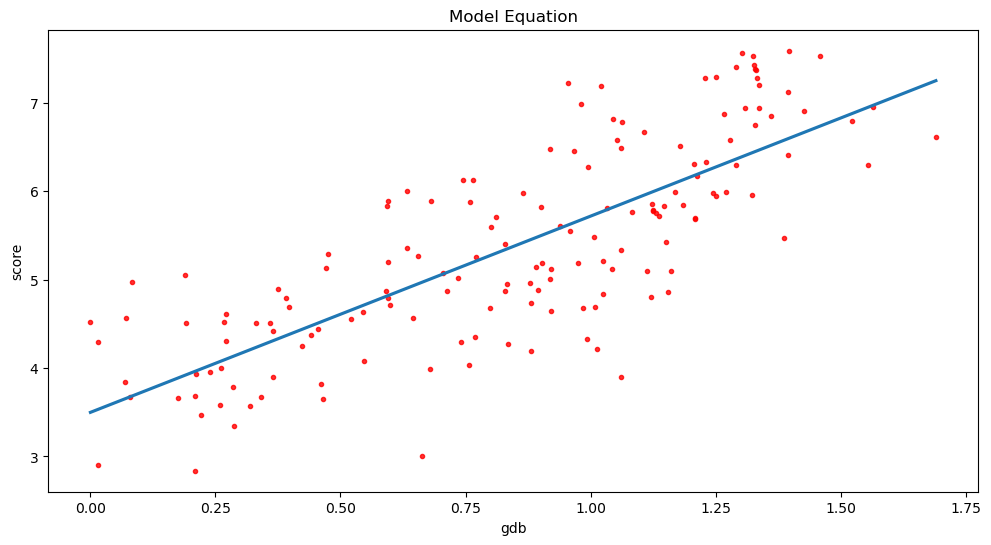

In [158]:
# prediction
plt.figure(figsize=(12,6))
g = sns.regplot(x=df_table["GDP"],y=df_table["Score"],ci=None,scatter_kws = {'color':'r','s':9})
g.set_title("Model Equation")
g.set_ylabel("score")
g.set_xlabel("gdb")
plt.show()

In [159]:
# model.intercep_ + model.coef_ * 1
model.predict([[1]])

array([[5.71703678]])

In [160]:
gdb_list = [[0.25],[0.50],[0.75],[1.00],[1.25],[1.50]]
model.predict(gdb_list)
for g in gdb_list:
    print("The happiness value of the country with a gdp value of ",g,": ",model.predict([g]))

The happiness value of the country with a gdp value of  [0.25] :  [[4.05336644]]
The happiness value of the country with a gdp value of  [0.5] :  [[4.60792322]]
The happiness value of the country with a gdp value of  [0.75] :  [[5.16248]]
The happiness value of the country with a gdp value of  [1.0] :  [[5.71703678]]
The happiness value of the country with a gdp value of  [1.25] :  [[6.27159356]]
The happiness value of the country with a gdp value of  [1.5] :  [[6.82615034]]


In [162]:
def linear_reg(col,text,prdctn):
    
    sns.jointplot(x=col,y="Score",data=df_table,kind="reg")
    plt.show()
    
    X = df_table[[col]]
    y = df_table[["Score"]]
    reg = LinearRegression()
    model = reg.fit(X,y)
    
    # prediction
    plt.figure(figsize=(12,6))
    g = sns.regplot(x=df_table[col],y=df_table["Score"],ci=None,scatter_kws = {'color':'r','s':9})
    g.set_title("Model Equation")
    g.set_ylabel("Score")
    g.set_xlabel(col)
    plt.show()
    
    print(text,": ", model.predict([[prdctn]]))

## Score-Family

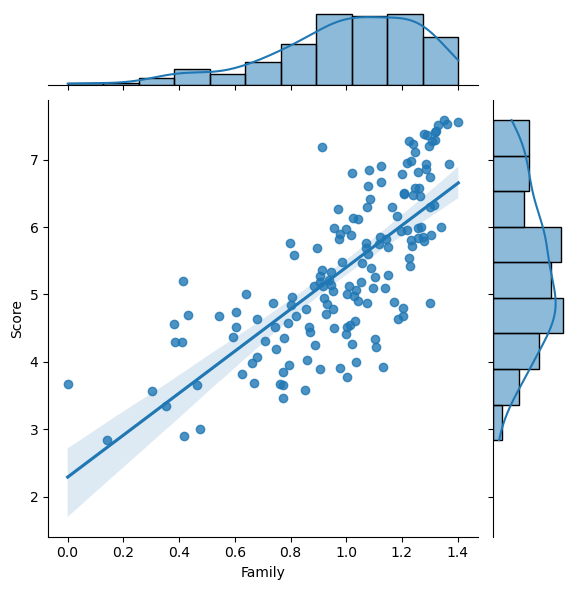

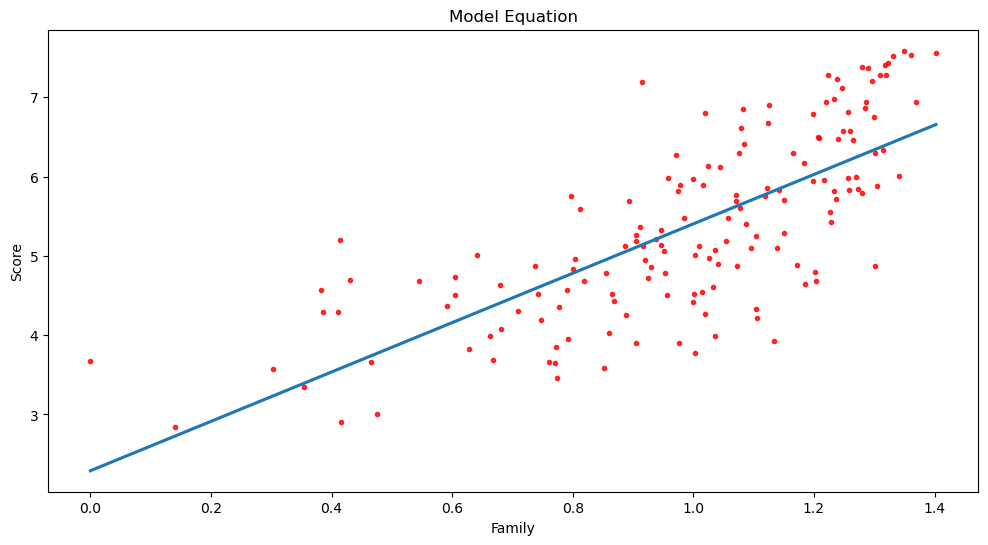

The happiness value of the country whose sociability value is 2: :  [[8.51703596]]


In [163]:
linear_reg("Family","The happiness value of the country whose sociability value is 2:",2)

## Score-Health

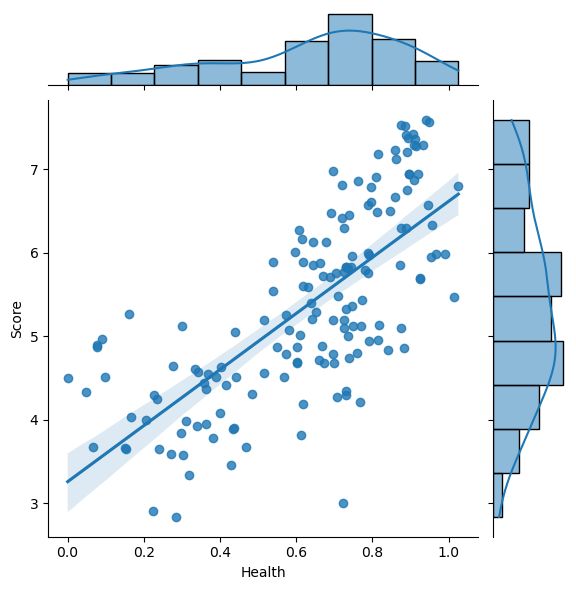

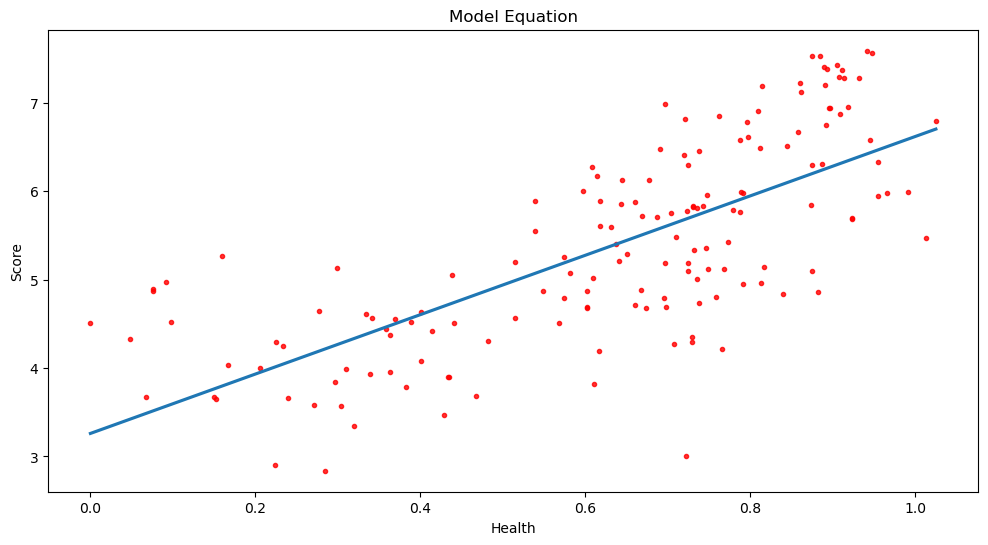

The happiness value of the country whose healthiest value is 1.20: :  [[7.28783653]]


In [164]:
linear_reg("Health","The happiness value of the country whose healthiest value is 1.20:",1.20)

## Score-Freedom

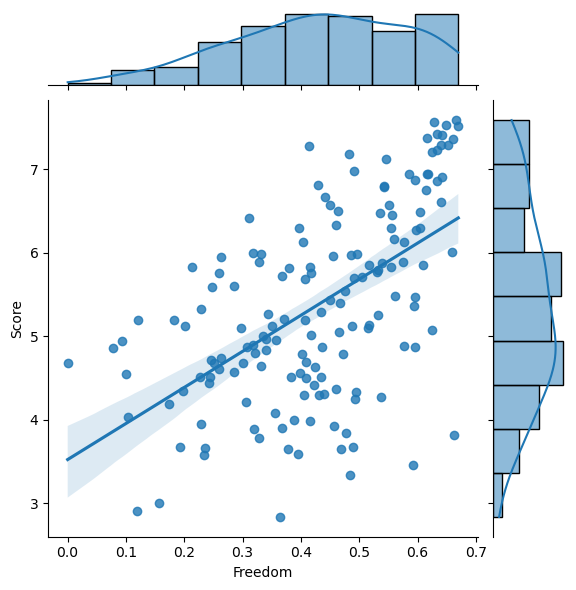

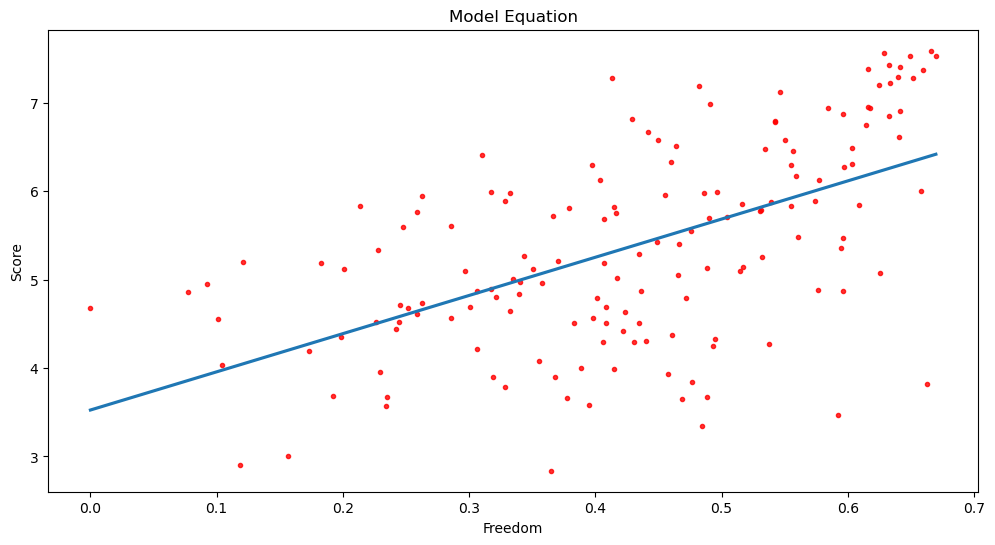

The happiness value of the country whose freedom value is 0.89: :  [[7.36773709]]


In [165]:
linear_reg("Freedom","The happiness value of the country whose freedom value is 0.89:",0.89)

In [ ]:
xlabels=bottom_10.Country
axes[0].set_title('Bottom 10 least happiest countries Health')
axes[0].set_xticklabels(xlabels,rotation=45,ha='right')
sns.barplot(x=top_10.Country,y=top_10.life_expectancy,ax=axes[0])
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Health')
plt.show()